In [1]:
from pytrends.request import TrendReq
from matplotlib import pyplot as plt
from alpha_vantage.timeseries import TimeSeries

/home/codespace/.python/current/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


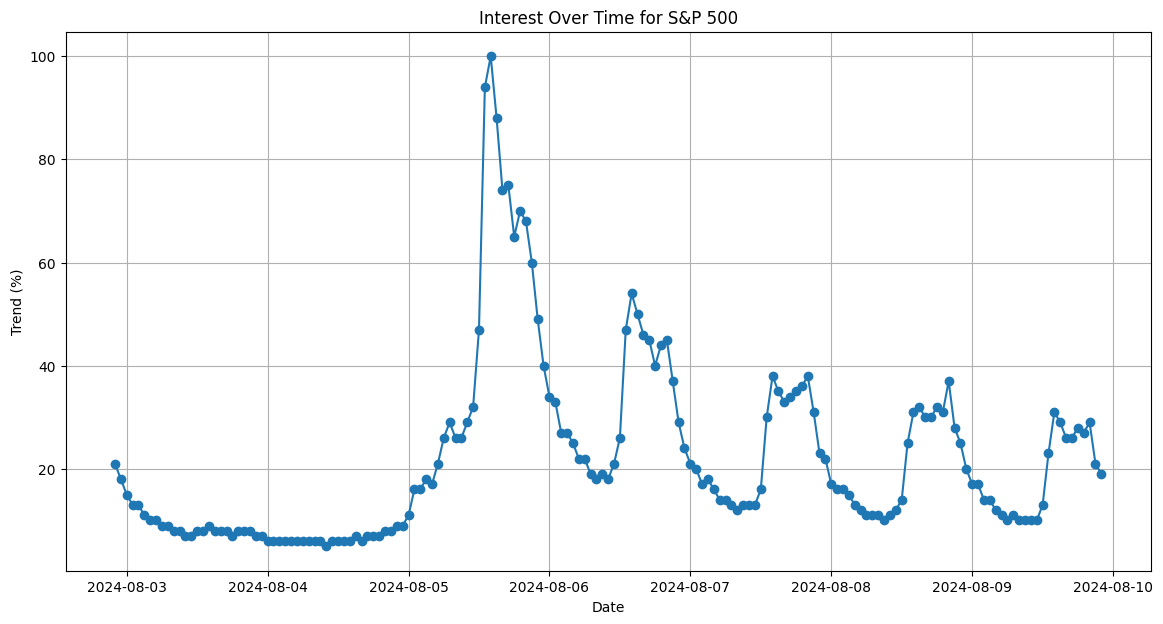

In [2]:
# Initialize the pytrends request
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keyword and timeframe
keyword = 'S&P 500'
timeframe = 'now 7-d'

# Build the payload and get the interest over time data
pytrends.build_payload([keyword], timeframe=timeframe)
data_trend = pytrends.interest_over_time()

# Check if the data is not empty
if not data_trend.empty:
    # Create the plot
    fig = plt.figure(figsize=(14, 7))
    plt.plot(data_trend[keyword], marker='o')
    plt.xlabel('Date')
    plt.ylabel('Trend (%)')
    plt.title(f'Interest Over Time for {keyword}')
    plt.grid(True)
    plt.show()
else:
    print(f"No data available for '{keyword}' over the last 7 days.")

In [3]:
api_key = 'MP6HQ4CABF8PNLB8'

In [4]:
symbol = 'SPY'  # S&P 500 ETF Trust symbol

# Initialize the TimeSeries object
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetch daily data
data_stock, meta_data = ts.get_intraday(symbol=symbol, outputsize='full', interval='60min')

# keep the first 24*7 rows of data
meta_data

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'SPY',
 '3. Last Refreshed': '2024-08-08 20:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [5]:
data_stock

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-08-08 20:00:00,530.65,530.650,530.650,530.650,2314446.0
2024-08-08 19:00:00,531.01,532.070,530.710,531.550,106929.0
2024-08-08 18:00:00,530.74,531.300,530.440,531.060,2553718.0
2024-08-08 17:00:00,531.01,531.200,499.755,530.640,214324.0
2024-08-08 16:00:00,530.64,531.835,499.287,531.010,13494844.0
...,...,...,...,...,...
2024-07-10 08:00:00,556.72,557.380,555.820,557.081,205609.0
2024-07-10 07:00:00,556.67,557.180,556.560,557.070,108444.0
2024-07-10 06:00:00,556.72,556.790,556.600,556.690,6626.0


In [6]:
data_stock = data_stock[0:80]
data_stock

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-08-08 20:00:00,530.65,530.650,530.650,530.650,2314446.0
2024-08-08 19:00:00,531.01,532.070,530.710,531.550,106929.0
2024-08-08 18:00:00,530.74,531.300,530.440,531.060,2553718.0
2024-08-08 17:00:00,531.01,531.200,499.755,530.640,214324.0
2024-08-08 16:00:00,530.64,531.835,499.287,531.010,13494844.0
...,...,...,...,...,...
2024-08-02 13:00:00,531.24,532.020,529.660,530.221,6076139.0
2024-08-02 12:00:00,532.19,533.520,530.570,531.255,6730058.0
2024-08-02 11:00:00,529.27,532.820,528.600,532.180,11568307.0


In [7]:
data_stock = data_stock['4. close']
etf_values = data_stock

In [8]:
data_stock

date
2024-08-08 20:00:00    530.650
2024-08-08 19:00:00    531.550
2024-08-08 18:00:00    531.060
2024-08-08 17:00:00    530.640
2024-08-08 16:00:00    531.010
                        ...   
2024-08-02 13:00:00    530.221
2024-08-02 12:00:00    531.255
2024-08-02 11:00:00    532.180
2024-08-02 10:00:00    529.260
2024-08-02 09:00:00    534.130
Name: 4. close, Length: 80, dtype: float64

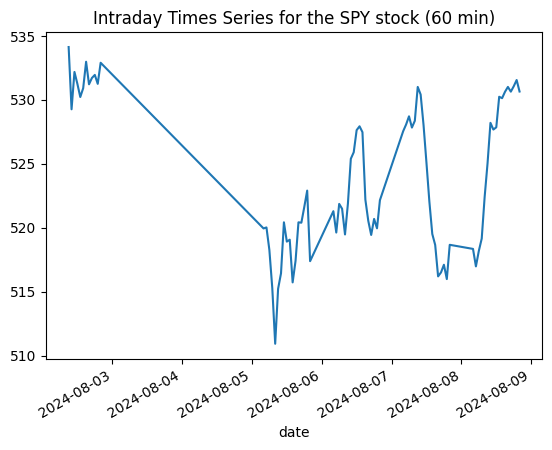

In [9]:
# plot data with matplotlib
etf_values.plot()
plt.title(f'Intraday Times Series for the {symbol} stock (60 min)')
plt.show()

In [10]:
import pandas as pd

In [11]:
aligned_df = pd.merge(data_trend, data_stock, left_index=True, right_index=True, how='inner')
aligned_df = aligned_df.drop(columns=['isPartial'])
aligned_df

,S&P 500,4. close
date,,
2024-08-05 04:00:00,17,519.94
2024-08-05 05:00:00,21,520.02
2024-08-05 06:00:00,26,518.26
2024-08-05 07:00:00,29,515.28
2024-08-05 08:00:00,26,510.92
...,...,...
2024-08-08 16:00:00,30,531.01
2024-08-08 17:00:00,30,530.64
2024-08-08 18:00:00,32,531.06


In [12]:
normalized_df = (aligned_df - aligned_df.mean()) / aligned_df.std()
normalized_df

,S&P 500,4. close
date,,
2024-08-05 04:00:00,-0.733503,-0.532547
2024-08-05 05:00:00,-0.543128,-0.517188
2024-08-05 06:00:00,-0.305160,-0.855077
2024-08-05 07:00:00,-0.162379,-1.427184
2024-08-05 08:00:00,-0.305160,-2.264226
...,...,...
2024-08-08 16:00:00,-0.114785,1.592695
2024-08-08 17:00:00,-0.114785,1.521661
2024-08-08 18:00:00,-0.019597,1.602294


In [13]:
correlation = normalized_df.corr().iloc[0, 1]

print("Correlation:", correlation)

Correlation: -0.30713764697105145


In [14]:
from scipy.stats import pearsonr
x = normalized_df.iloc[:, 0]  # First column from df1
y = normalized_df.iloc[:, 1]  # First column from df2

# Step 3: Calculate the Pearson correlation and the p-value
correlation, p_value = pearsonr(x, y)

print("Pearson Correlation:", correlation)
print("P-value:", p_value)

Pearson Correlation: -0.3071376469710514
P-value: 0.010844564844191228


In [16]:
import requests

# Votre clé API NewsAPI
api_key = '8b99d770554e41169ae57965c5d31795'

# URL de base pour les requêtes
url = 'https://newsapi.org/v2/top-headlines'

# Paramètres de la requête
params = {
    'apiKey': api_key,
    'country': 'us',  # Choisissez le pays (ici France)
    'category': 'general',  # Catégorie de nouvelles (general, business, technology, etc.)
    'pageSize': 10  # Nombre d'articles à récupérer
}

# Faire la requête GET à l'API NewsAPI
response = requests.get(url, params=params)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Convertir la réponse JSON en dictionnaire Python
    data = response.json()
    
    # Afficher les titres des articles
    articles = data.get('articles', [])
    for i, article in enumerate(articles):
        print(f"{i + 1}. {article['title']}")
        print(f"   Source: {article['source']['name']}")
        print(f"   Description: {article['description']}")
        print(f"   URL: {article['url']}\n")
else:
    print(f"Erreur: {response.status_code} - {response.text}")


1. New body cam video shows moment police officer saw Trump shooter just before assassination attempt - CNN
   Source: Google News
   Description: None
   URL: https://news.google.com/rss/articles/CBMikAFBVV95cUxOVGFZX0R2Qy1BYlY4UHBMSWxqclBqSDZfdXVGeWtEejIwM2lLVmhqYWc0dTF3dEN5T1I3MXNZaFk4dlRVVVZ5d3BGUFM0am50dlc5dDRLVVhwdjR1UFZqWWUtMFVueEZqVnNQSDF1R2dKVTFfZlVGNmF4T1ByS1VYY0I2WFFwUXhwbjFhZmpwQ2_SAYcBQVVfeXFMTUg3THktVVNvT09wR0NGVlBOWmlVUXNhOHJyR2dfUk90QWtYQnRpdkxTQTl0Y09RUW82bVNUR0VMMFhlZlVwNDZ0b1hBVU42dW9tQURad2ZJdmJOLXRHR3A2bENMME5tQS14anVkeTh6dkJTc3BZMUdGQUV0WS1GV1pielFxdE5N?oc=5

2. Ranking top five Week 1 preseason games to watch: Former Buckeyes Justin Fields and C.J. Stroud face off - CBS Sports
   Source: Google News
   Description: None
   URL: https://news.google.com/rss/articles/CBMi1AFBVV95cUxOM2Y4emhHTWI1U1lUM0FCa1V3d1FUVkYtcVk5MHRSLUtmb3ZYQTl3M0J2VURuQjlSSEVJS3pnQnEwd2ZqUVZ6UTdONkNKbWZqR0FfMV91bjFCWmtUaFY2TW9tdEVtaElMNDNRT0lnS3RraElaY1NCblgzbE5xeWRhc0t3R0FXUl92eWNhUXpiaTBKSj

In [18]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey={api_key}'
r = requests.get(url)
data = r.json()

data

{'items': '50',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': "Warren Buffett Just Cut Half of Berkshire Hathaway's Stake in Apple. Why?",
   'url': 'https://www.fool.com/investing/2024/08/09/warren-buffett-just-cut-half-of-berkshire-hathaway/',
   'time_published': '20240809T210900',
   'authors': ['Jeremy Bowman'],
   'summary': "Perhaps Buffett doesn't love Apple as much as investors thought.",
   'banner_image': 'https://g.foolcdn.com/image/?url=https%3A%2F%2Fg.foolcdn.com%2Feditorial%2Fimages%2F786068%2Fbuffett16-tmf.jpg&op=resize&w=700',
   'source': 'Motley Fool',
   'category_within_source': 'n/a',
   'source_domain': 'www.fool.com',
   'topics': [{'topic': 'Financial Markets', 'relevance_score': '0.962106'},
    {'topic': 'Earnings', 're

In [19]:
url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol=IBM&apikey={api_key}'
r = requests.get(url)
data = r.json()
data

{'Symbol': 'IBM',
 'AssetType': 'Common Stock',
 'Name': 'International Business Machines',
 'Description': 'International Business Machines Corporation (IBM) is an American multinational technology company headquartered in Armonk, New York, with operations in over 170 countries. The company began in 1911, founded in Endicott, New York, as the Computing-Tabulating-Recording Company (CTR) and was renamed International Business Machines in 1924. IBM is incorporated in New York. IBM produces and sells computer hardware, middleware and software, and provides hosting and consulting services in areas ranging from mainframe computers to nanotechnology. IBM is also a major research organization, holding the record for most annual U.S. patents generated by a business (as of 2020) for 28 consecutive years. Inventions by IBM include the automated teller machine (ATM), the floppy disk, the hard disk drive, the magnetic stripe card, the relational database, the SQL programming language, the UPC bar